In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
from scipy.signal import convolve2d

In [23]:
location = 	"""Cam 137 Waterbury"""
prefix = """data\img_"""+location+" n "
images = np.array([mpimg.imread(prefix+str(i)+".jpeg") for i in range(0,100)])

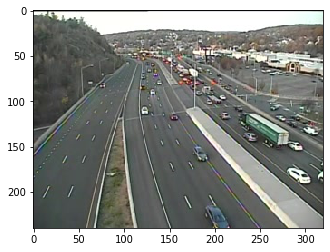

In [58]:
original = images[15]
plt.imshow(original)
plt.show()

In [59]:
plt.imsave("exhibit/exhibit_3_greentruck.png", original)

In [18]:
images.shape

(100, 240, 320, 3)

In [19]:
background = images.mean(axis=0).astype(int)

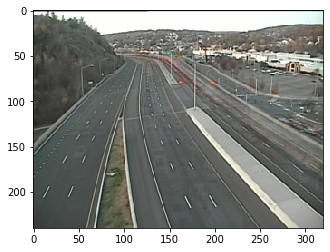

In [20]:
plt.imshow(background)

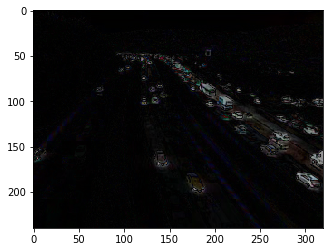

In [21]:
difference = np.abs(original-background)
plt.imshow(difference)

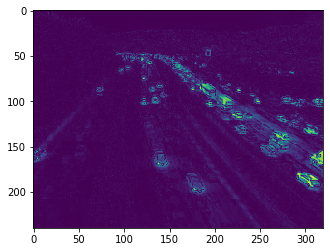

In [22]:
difference_grey = difference.mean(axis=2)
plt.imshow(difference_grey)

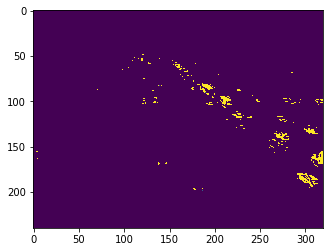

In [23]:
threshold = 75
difference_grey_thresholded = difference_grey.copy()
below_threshold_indices = difference_grey < threshold
above_threshold_indices = difference_grey > threshold
difference_grey_thresholded[below_threshold_indices] = 0
difference_grey_thresholded[above_threshold_indices] = 255
plt.imshow(difference_grey_thresholded)

# Simple convolution

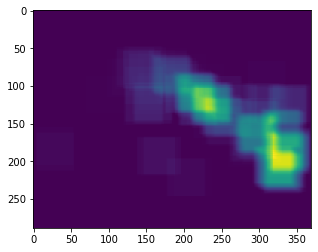

In [24]:
out = convolve2d(difference_grey_thresholded,np.ones((50,50)))
plt.imshow(out)

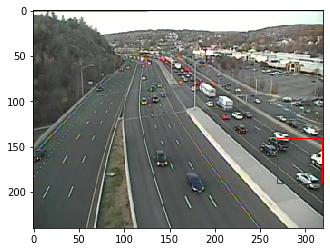

In [25]:
i,j = np.unravel_index(out.argmax(), out.shape)
with_square = original.copy()
bot = i-50
up = i
left = j-50
right =j

with_square[bot:up,left,:]=[255,0,0]
with_square[bot:up,right,:]=[255,0,0]
with_square[bot,left:right,:]=[255,0,0]
with_square[up,left:right,:]=[255,0,0]

#with_square[i-1:i+1,j-:j+1,:]=255
#with_square[i-1:i+1,j-25:j+1,:]=255
plt.imshow(with_square)
#rect = matplotlib.patches.Rectangle((i-5,j-5),10,10, edgecolor='r', facecolor="none")

# Largest connected component

(240, 320)
Number of objects is 130


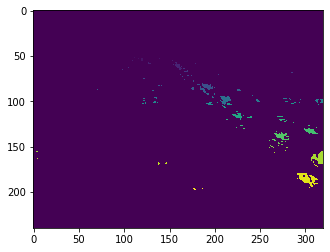

In [26]:
# EXTRACT CONNECTED COMPONENTS

from PIL import Image
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

blur_radius = 0.5
threshold = 50

img = difference_grey_thresholded
print(img.shape)
# (160, 240)

# smooth the image (to remove small objects)
imgf = ndimage.gaussian_filter(img, blur_radius)
threshold = 50

# find connected components
labeled, nr_objects = ndimage.label(imgf > threshold) 
print("Number of objects is {}".format(nr_objects))
# Number of objects is 4 

plt.imshow(labeled)

plt.show()


In [27]:
connected_components, size_components = np.unique(labeled, return_counts =True)

In [28]:
k_max = np.argsort(size_components)[-2]
connected_components[k_max]
indices_of_max_component = np.argwhere(labeled == k_max)
up = max(indices_of_max_component[:,0])
bot = min(indices_of_max_component[:,0])
right = max(indices_of_max_component[:,1])
left = min(indices_of_max_component[:,1])


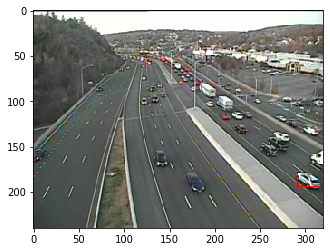

In [29]:
with_rectangle = original.copy()
with_rectangle[bot:up,left,:]=[255,0,0]
with_rectangle[bot:up,right,:]=[255,0,0]
with_rectangle[bot,left:right,:]=[255,0,0]
with_rectangle[up,left:right,:]=[255,0,0]

#with_square[i-1:i+1,j-:j+1,:]=255
#with_square[i-1:i+1,j-25:j+1,:]=255
plt.imshow(with_rectangle)
#rect = matplotlib.patches.Rectangle((i-5,j-5),10,10, edgecolor='r', facecolor="none")